In [ ]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core fonts-dejavu-extra
  fonts-droid-fallback fonts-ebgaramond fonts-ebgaramond-extra fonts-font-awesome
  fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go fonts-junicode fonts-lato
  fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo fonts-noto-color-emoji
  fonts-noto-core fonts-noto-mono fonts-oflb-asana-math fonts-open-sans fonts-roboto-unhinted
  fonts-sil-charis fonts-sil-gentium fonts-sil-gentium-basic fonts-sil-gentiumplus
  fonts-sil-gentiumplus-compact fonts-stix fonts-texgyre fo

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 41.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
params = {'text.usetex' : True,
          'font.size' : 11,
          'lines.markersize': 2,
          'lines.linewidth':1,
          'axes.labelpad': 1,
          'axes.labelpad': 1,
          'axes.facecolor': 'white'
          }

plt.rc('text.latex', preamble=r'\usepackage{amsfonts}')

plt.rcParams.update(params)

In [ ]:
file = open("Num_Orbs_LiH",'rb')
O_dict = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


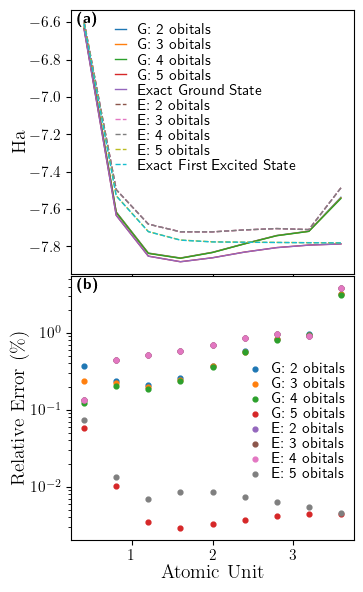

In [ ]:
fig,axes = plt.subplots(2,1,sharex = True,sharey = False, figsize =  (1.35*3.375*0.8,1.35*0.85*3.375*2*8/9),squeeze = False)#,width_ratios=[1,1.04])
plt.subplots_adjust(hspace=0.01)
r_lst=[0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6,4.0]
ob_lst=[2,3,4,5,6]
for ob in ob_lst:
    if ob==6:
        axes[0,0].plot(r_lst[:-1],O_dict[ob][0][:-1],label='Exact Ground State')
    else:
        axes[0,0].plot(r_lst[:-1],O_dict[ob][0][:-1],label='G: '+str(ob)+' obitals')

for ob in ob_lst:
    if ob==6:

        axes[0,0].plot(r_lst[:-1],O_dict[ob][1][:-1],'--',label='Exact First Excited State')
    else:
        axes[0,0].plot(r_lst[:-1],O_dict[ob][1][:-1],'--',label='E: '+str(ob)+' obitals')
    #plt.plot(r_lst,O_dict[ob][2],':',label='S E'+str(ob))
#axes[0,0].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$",fontsize=14)
axes[0,0].set_ylabel(r"$\mathrm{Ha}$",fontsize=14)
axes[0,0].legend(bbox_to_anchor=(0.48, 1.0),loc='upper center',frameon=False,labelspacing = 0.09,handlelength=0.7)
axes[0,0].text(0.02,0.95,r"$\textbf{(a)}$",transform=axes[0,0].transAxes)

r_lst=[0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6,4.0]
ob_lst=[2,3,4,5]
for ob in ob_lst:
    Rel_e=np.abs(np.array(O_dict[ob][0][:-1])-np.array(O_dict[6][0][:-1]))*100/np.abs(O_dict[6][0][:-1])
    axes[1,0].scatter(r_lst[:-1],Rel_e,label='G: '+str(ob)+' obitals',s=12)

for ob in ob_lst:
    Rel_e=np.abs(np.array(O_dict[ob][1][:-1])-np.array(O_dict[6][1][:-1]))*100/np.abs(O_dict[6][1][:-1])
    axes[1,0].scatter(r_lst[:-1],Rel_e,label='E: '+str(ob)+' obitals',s=12)
    #plt.plot(r_lst,O_dict[ob][2],':',label='S E'+str(ob))
axes[1,0].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$",fontsize=14)
axes[1,0].set_ylabel(r"$\mathrm{Relative}$ $\mathrm{Error}$ $\mathrm{(\%)}$",fontsize=14)
axes[1,0].legend(bbox_to_anchor=(1.02, 0.45),loc='center right',frameon=False,labelspacing = 0.09,handlelength=0.7)
axes[1,0].text(0.02,0.95,r"$\textbf{(b)}$",transform=axes[1,0].transAxes)
axes[1,0].set_yscale('log')

plt.savefig("Orb_Re.png",dpi = 300,bbox_inches='tight',facecolor='white',transparent=False)

In [ ]:
with open('VQD_S0.npy', 'rb') as f:
    E0_arr = np.load(f)

with open('VQD_T1.npy', 'rb') as f:
    E1_arr = np.load(f)

with open('VQD_S1.npy', 'rb') as f:
    E2_arr = np.load(f)

In [ ]:
for i in  range(10):
    E_lst=[E0_arr[i],E1_arr[i],E2_arr[i]]
    E0_arr[i],E1_arr[i],E2_arr[i]=np.sort(E_lst)


In [ ]:
E2_arr

array([-6.56991067, -7.51262254, -7.70593583, -7.74837642, -7.74970617,
       -7.74371822, -7.73088843, -7.71707305, -7.69217668, -7.69435889])

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


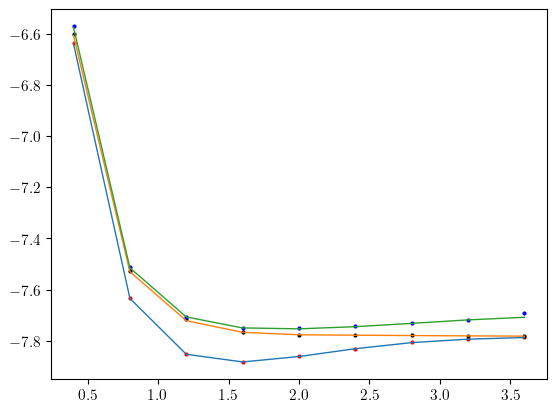

In [ ]:
#fig,axes = plt.subplots(2,1,sharex = True,sharey = False, figsize = (1.25*3.375*55/52*0.95,1.25*3.375*2*0.95),squeeze = False)#,width_ratios=[1,1.04])
#plt.subplots_adjust(hspace=0.01)
plt.plot(r_lst[:-1],O_dict[6][0][:-1])
plt.plot(r_lst[:-1],O_dict[6][1][:-1])
plt.plot(r_lst[:-1],O_dict[6][2][:-1])

plt.scatter(r_lst[:-1],E0_arr[:-1],c='r')
plt.scatter(r_lst[:-1],E1_arr[:-1],c='k')
plt.scatter(r_lst[:-1],E2_arr[:-1],c='b')

In [ ]:
with open('SSVQE_S0.npy', 'rb') as f:
    E0_S_arr = np.load(f)

with open('SSVQE_T1.npy', 'rb') as f:
    E1_S_arr = np.load(f)

with open('SSVQE_S1.npy', 'rb') as f:
    E2_S_arr = np.load(f)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


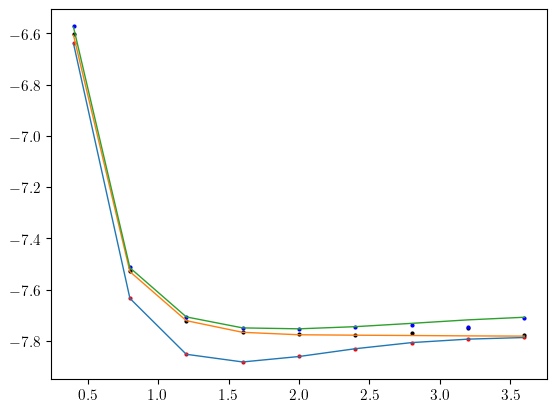

In [ ]:
plt.plot(r_lst[:-1],O_dict[6][0][:-1])
plt.plot(r_lst[:-1],O_dict[6][1][:-1])
plt.plot(r_lst[:-1],O_dict[6][2][:-1])

plt.scatter(r_lst[:-1],E0_S_arr[:-1],c='r')
plt.scatter(r_lst[:-1],E1_S_arr[:-1],c='k')
plt.scatter(r_lst[:-1],E2_S_arr[:-1],c='b')

In [ ]:
Rel0=np.abs(np.array(O_dict[6][0])-E0_arr)/np.abs(np.array(O_dict[6][0]))
Rel1=np.abs(np.array(O_dict[6][1])-E1_arr)/np.abs(np.array(O_dict[6][1]))
Rel2=np.abs(np.array(O_dict[6][2])-E2_arr)/np.abs(np.array(O_dict[6][2]))

In [ ]:
Rel0_S=np.abs(np.array(O_dict[6][0])-E0_S_arr)/np.abs(np.array(O_dict[6][0]))
Rel1_S=np.abs(np.array(O_dict[6][1])-E1_S_arr)/np.abs(np.array(O_dict[6][1]))
Rel2_S=np.abs(np.array(O_dict[6][2])-E2_S_arr)/np.abs(np.array(O_dict[6][2]))

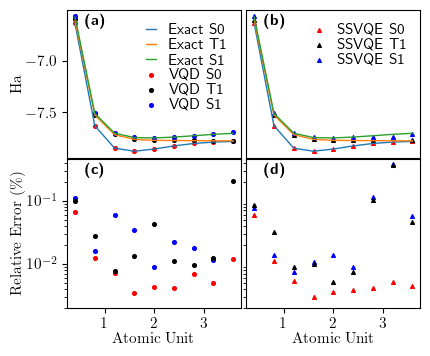

In [ ]:
fig,axes = plt.subplots(2,2,sharex = True,sharey = False, figsize = (1.35*3.375,1.35*0.85*3.375),squeeze = False)#,width_ratios=[1,1.04])
plt.subplots_adjust(hspace=0.01,wspace=0.03)



axes[1,0].scatter(r_lst[:-1],Rel0[:-1]*100,s=7,c='r',label='VQD S0')
axes[1,0].scatter(r_lst[:-1],Rel1[:-1]*100,s=7,c='b',label='VQD T1')
axes[1,0].scatter(r_lst[:-1],Rel2[:-1]*100,s=7,c='k',label='VQD S1')
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(0.002,0.45)
#axes[1,0].set_yticks([0.02,0.04,0.06,0.08])

axes[1,0].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$")
axes[1,0].set_ylabel(r"$\mathrm{Relative}$ $\mathrm{Error}$ $\mathrm{(\%)}$")
axes[1,0].text(0.1,0.9,r"$\textbf{(c)}$",transform=axes[1,0].transAxes)
#axes[0,0].grid()

axes[0,0].plot(r_lst[:-1],O_dict[6][0][:-1],label='Exact S0')
axes[0,0].plot(r_lst[:-1],O_dict[6][1][:-1],label='Exact T1')
axes[0,0].plot(r_lst[:-1],O_dict[6][2][:-1],label='Exact S1')

axes[0,0].scatter(r_lst[:-1],E0_arr[:-1],s=7,c='r',label='VQD S0')
axes[0,0].scatter(r_lst[:-1],E1_arr[:-1],s=7,c='k',label='VQD T1')
axes[0,0].scatter(r_lst[:-1],E2_arr[:-1],s=7,c='b',label='VQD S1')

axes[0,0].text(0.1,0.9,r"$\textbf{(a)}$",transform=axes[0,0].transAxes)
axes[0,0].legend(frameon=False,labelspacing = 0.09,handlelength=0.7)
axes[0,0].set_ylabel(r"$\mathrm{Ha}$")

axes[0,1].plot(r_lst[:-1],O_dict[6][0][:-1])
axes[0,1].plot(r_lst[:-1],O_dict[6][1][:-1])
axes[0,1].plot(r_lst[:-1],O_dict[6][2][:-1])

axes[0,1].scatter(r_lst[:-1],E0_S_arr[:-1],s=7,marker='^',c='r',label='SSVQE S0')
axes[0,1].scatter(r_lst[:-1],E1_S_arr[:-1],s=7,marker='^',c='k',label='SSVQE T1')
axes[0,1].scatter(r_lst[:-1],E2_S_arr[:-1],s=7,marker='^',c='b',label='SSVQE S1')
axes[0,1].set_yticks([])
axes[0,1].legend(frameon=False,labelspacing = 0.09,handlelength=0.7)
axes[0,1].text(0.1,0.9,r"$\textbf{(b)}$",transform=axes[0,1].transAxes)


axes[1,1].scatter(r_lst[:-1],Rel0_S[:-1]*100,s=7,marker='^',c='r',label='VQD S0')
axes[1,1].scatter(r_lst[:-1],Rel1_S[:-1]*100,s=7,marker='^',c='b',label='VQD T1')
axes[1,1].scatter(r_lst[:-1],Rel2_S[:-1]*100,s=7,marker='^',c='k',label='VQD S1')
axes[1,1].set_yscale('log')
axes[1,1].set_ylim(0.002,0.45)
axes[1,1].set_yticks([])

axes[1,1].text(0.1,0.9,r"$\textbf{(d)}$",transform=axes[1,1].transAxes)
axes[1,1].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$")
plt.savefig("Compar_1.png",dpi = 300,bbox_inches='tight',facecolor='white',transparent=False)


In [ ]:
with open('VQD_iter1.npy', 'rb') as f:
    iter1 = np.load(f)

with open('VQD_iter2.npy', 'rb') as f:
    iter2 = np.load(f)

with open('VQD_iter3.npy', 'rb') as f:
    iter3 = np.load(f)

In [ ]:
np.mean(iter1[:-1])

66.44444444444444

In [ ]:
np.mean(iter2[:-1])

66.55555555555556

In [ ]:
np.mean(iter3[:-1])

71.88888888888889

In [ ]:
np.mean((iter1[:-1]+iter2[:-1]+iter3[:-1])/3)

68.29629629629629

In [ ]:
with open('SS_VQE_iter.npy', 'rb') as f:
    iter = np.load(f)

In [ ]:
np.mean(iter[:-1])

114.11111111111111

In [ ]:
with open('T_VQD_S0.npy', 'rb') as f:
    E0_arr = np.load(f)

with open('T_VQD_T1.npy', 'rb') as f:
    E1_arr = np.load(f)

with open('T_VQD_S1.npy', 'rb') as f:
    E2_arr = np.load(f)

In [ ]:

for i in range(10):
     E0,E1,E2=np.sort([E0_arr[i],E1_arr[i],E2_arr[i]])
     E0_arr[i]=E0
     E1_arr[i]=E1
     E2_arr[i]=E2

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


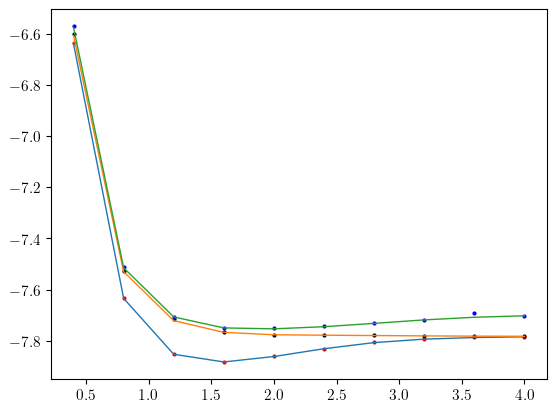

In [ ]:
plt.plot(r_lst,O_dict[6][0])
plt.plot(r_lst,O_dict[6][1])
plt.plot(r_lst,O_dict[6][2])

plt.scatter(r_lst,E0_arr,c='r')
plt.scatter(r_lst,E1_arr,c='k')
plt.scatter(r_lst,E2_arr,c='b')

In [ ]:
Rel0=np.abs(np.array(O_dict[6][0])-E0_arr)/np.abs(np.array(O_dict[6][0]))
Rel1=np.abs(np.array(O_dict[6][1])-E1_arr)/np.abs(np.array(O_dict[6][1]))
Rel2=np.abs(np.array(O_dict[6][2])-E2_arr)/np.abs(np.array(O_dict[6][2]))

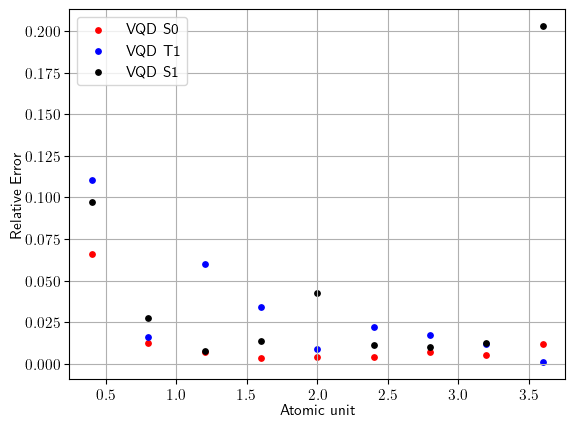

In [ ]:
plt.scatter(r_lst[:-1],Rel0[:-1]*100,s=15,c='r',label='VQD S0')
plt.scatter(r_lst[:-1],Rel1[:-1]*100,s=15,c='b',label='VQD T1')
plt.scatter(r_lst[:-1],Rel2[:-1]*100,s=15,c='k',label='VQD S1')

plt.xlabel('Atomic unit')
plt.ylabel('Relative Error')

plt.grid()
plt.legend()


In [ ]:
with open('T_VQD_iter1.npy', 'rb') as f:
    iter1 = np.load(f)

with open('T_VQD_iter2.npy', 'rb') as f:
    iter2 = np.load(f)

with open('T_VQD_iter3.npy', 'rb') as f:
    iter3 = np.load(f)

In [ ]:
np.mean(iter1[:-1])

66.44444444444444

In [ ]:
np.mean(iter2[:-1])

66.55555555555556

In [ ]:
np.mean(iter3[:-1])

71.88888888888889

In [ ]:
np.mean((iter1[:-1]+iter2[:-1]+iter3[:-1])/3)

68.29629629629629

In [ ]:
iter0_lst=[253, 263, 283, 387, 317, 305, 285, 288, 233]
iter1_lst=[208, 191, 212, 218, 205, 239, 156, 242, 215]
iter2_lst=[105, 93, 94, 112, 125, 135, 399, 338, 73]

In [ ]:
np.mean(iter2_lst)

163.77777777777777

In [ ]:
with open('SS_VQE_iter.npy', 'rb') as f:
    iter = np.load(f)

In [ ]:
np.mean(iter[:-1])

114.11111111111111

In [ ]:
with open('T_SSVQE_S0.npy', 'rb') as f:
    E0_S_arr = np.load(f)

with open('T_SSVQE_T1.npy', 'rb') as f:
    E1_S_arr = np.load(f)

with open('T_SSVQE_S1.npy', 'rb') as f:
    E2_S_arr = np.load(f)

In [ ]:

for i in range(10):
     E0,E1,E2=np.sort([E0_S_arr[i],E1_S_arr[i],E2_S_arr[i]])
     E0_S_arr[i]=E0
     E1_S_arr[i]=E1
     E2_S_arr[i]=E2

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


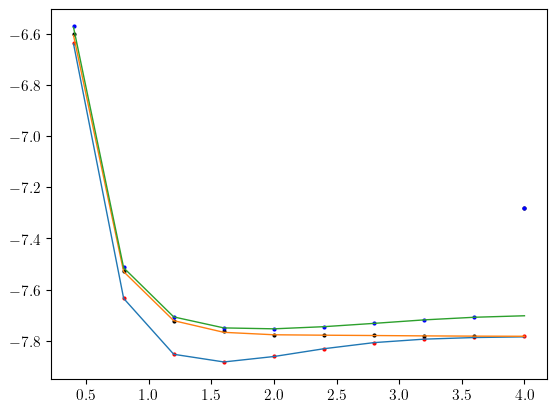

In [ ]:
plt.plot(r_lst,O_dict[6][0])
plt.plot(r_lst,O_dict[6][1])
plt.plot(r_lst,O_dict[6][2])

plt.scatter(r_lst,E0_S_arr,c='r')
plt.scatter(r_lst,E1_S_arr,c='k')
plt.scatter(r_lst,E2_S_arr,c='b')

In [ ]:
Rel0_S=np.abs(np.array(O_dict[6][0])-E0_S_arr)/np.abs(np.array(O_dict[6][0]))
Rel1_S=np.abs(np.array(O_dict[6][1])-E1_S_arr)/np.abs(np.array(O_dict[6][1]))
Rel2_S=np.abs(np.array(O_dict[6][2])-E2_S_arr)/np.abs(np.array(O_dict[6][2]))

In [ ]:
with open('T_VQD_S0_se.npy', 'rb') as f:
    E0_SE_arr = np.load(f)

with open('T_VQD_T1_se.npy', 'rb') as f:
    E1_SE_arr = np.load(f)

with open('T_VQD_S1_se.npy', 'rb') as f:
    E2_SE_arr = np.load(f)

In [ ]:
for i in range(10):
     E0,E1,E2=np.sort([E0_SE_arr[i],E1_SE_arr[i],E2_SE_arr[i]])
     E0_SE_arr[i]=E0
     E1_SE_arr[i]=E1
     E2_SE_arr[i]=E2

In [ ]:
Rel0_SE=np.abs(np.array(O_dict[6][0])-E0_SE_arr)/np.abs(np.array(O_dict[6][0]))
Rel1_SE=np.abs(np.array(O_dict[6][1])-E1_SE_arr)/np.abs(np.array(O_dict[6][1]))
Rel2_SE=np.abs(np.array(O_dict[6][2])-E2_SE_arr)/np.abs(np.array(O_dict[6][2]))

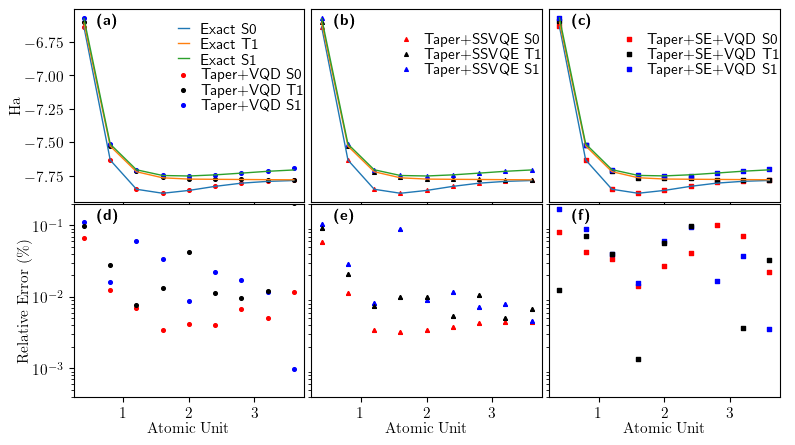

In [ ]:
fig,axes = plt.subplots(2,3,sharex = True,sharey = False, figsize = (2*1.35*3.375,1.3*1.35*0.85*3.375),squeeze = False)#,width_ratios=[1,1.04])
plt.subplots_adjust(hspace=0.01,wspace=0.03)



axes[1,0].scatter(r_lst[:-1],Rel0[:-1]*100,s=7,c='r',label='VQD S0')
axes[1,0].scatter(r_lst[:-1],Rel1[:-1]*100,s=7,c='b',label='VQD T1')
axes[1,0].scatter(r_lst[:-1],Rel2[:-1]*100,s=7,c='k',label='VQD S1')
axes[1,0].set_yticks([0.02,0.04,0.06,0.08])

axes[1,0].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$")
axes[1,0].set_ylabel(r"$\mathrm{Relative}$ $\mathrm{Error}$ $\mathrm{(\%)}$")
axes[1,0].text(0.1,0.92,r"$\textbf{(d)}$",transform=axes[1,0].transAxes)
#axes[1,0].set_yticks([0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14])
axes[1,0].set_yscale('log')
axes[1,0].set_ylim(0.0004,0.2)
#axes[0,0].grid()

axes[0,0].plot(r_lst[:-1],O_dict[6][0][:-1],label='Exact S0')
axes[0,0].plot(r_lst[:-1],O_dict[6][1][:-1],label='Exact T1')
axes[0,0].plot(r_lst[:-1],O_dict[6][2][:-1],label='Exact S1')

axes[0,0].scatter(r_lst[:-1],E0_arr[:-1],s=7,c='r',label='Taper+VQD S0')
axes[0,0].scatter(r_lst[:-1],E1_arr[:-1],s=7,c='k',label='Taper+VQD T1')
axes[0,0].scatter(r_lst[:-1],E2_arr[:-1],s=7,c='b',label='Taper+VQD S1')

axes[0,0].text(0.1,0.92,r"$\textbf{(a)}$",transform=axes[0,0].transAxes)
axes[0,0].legend(bbox_to_anchor=(1.06, 1.0),loc='upper right',frameon=False,labelspacing = 0.09,handlelength=0.7)
axes[0,0].set_ylabel(r"$\mathrm{Ha}$")

axes[0,1].plot(r_lst[:-1],O_dict[6][0][:-1])
axes[0,1].plot(r_lst[:-1],O_dict[6][1][:-1])
axes[0,1].plot(r_lst[:-1],O_dict[6][2][:-1])

axes[0,1].scatter(r_lst[:-1],E0_S_arr[:-1],s=7,marker='^',c='r',label='Taper+SSVQE S0')
axes[0,1].scatter(r_lst[:-1],E1_S_arr[:-1],s=7,marker='^',c='k',label='Taper+SSVQE T1')
axes[0,1].scatter(r_lst[:-1],E2_S_arr[:-1],s=7,marker='^',c='b',label='Taper+SSVQE S1')
axes[0,1].set_yticks([])
axes[0,1].legend(bbox_to_anchor=(1.06, 0.95),loc='upper right',frameon=False,labelspacing = 0.09,handlelength=0.7)
axes[0,1].text(0.1,0.92,r"$\textbf{(b)}$",transform=axes[0,1].transAxes)

axes[0,2].plot(r_lst[:-1],O_dict[6][0][:-1])
axes[0,2].plot(r_lst[:-1],O_dict[6][1][:-1])
axes[0,2].plot(r_lst[:-1],O_dict[6][2][:-1])

axes[0,2].scatter(r_lst[:-1],E0_SE_arr[:-1],s=7,marker='s',c='r',label='Taper+SE+VQD S0')
axes[0,2].scatter(r_lst[:-1],E1_SE_arr[:-1],s=7,marker='s',c='k',label='Taper+SE+VQD T1')
axes[0,2].scatter(r_lst[:-1],E2_SE_arr[:-1],s=7,marker='s',c='b',label='Taper+SE+VQD S1')
axes[0,2].set_yticks([])
axes[0,2].legend(bbox_to_anchor=(1.06, 0.95),loc='upper right',frameon=False,labelspacing = 0.09,handlelength=0.7)
axes[0,2].text(0.1,0.92,r"$\textbf{(c)}$",transform=axes[0,2].transAxes)

axes[1,1].scatter(r_lst[:-1],Rel0_S[:-1]*100,s=7,marker='^',c='r')
axes[1,1].scatter(r_lst[:-1],Rel1_S[:-1]*100,s=7,marker='^',c='b')
axes[1,1].scatter(r_lst[:-1],Rel2_S[:-1]*100,s=7,marker='^',c='k')
axes[1,1].set_yticks([0.02,0.04,0.06,0.08,0.1])

axes[1,1].text(0.1,0.92,r"$\textbf{(e)}$",transform=axes[1,1].transAxes)
axes[1,1].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$")

axes[1,1].scatter(r_lst[:-1],Rel0_S[:-1]*100,s=7,marker='^',c='r',label='VQD S0')
axes[1,1].scatter(r_lst[:-1],Rel1_S[:-1]*100,s=7,marker='^',c='b',label='VQD T1')
axes[1,1].scatter(r_lst[:-1],Rel2_S[:-1]*100,s=7,marker='^',c='k',label='VQD S1')

axes[1,1].set_yscale('log')
axes[1,1].set_yticks([])
axes[1,1].set_ylim(0.0004,0.2)

#axes[1,1].text(0.1,0.9,r"$\mathrm{(d)}$",transform=axes[1,1].transAxes)
axes[1,1].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$")

axes[1,2].scatter(r_lst[:-1],Rel0_SE[:-1]*100,s=7,marker='s',c='r',label='VQD S0')
axes[1,2].scatter(r_lst[:-1],Rel1_SE[:-1]*100,s=7,marker='s',c='b',label='VQD T1')
axes[1,2].scatter(r_lst[:-1],Rel2_SE[:-1]*100,s=7,marker='s',c='k',label='VQD S1')
axes[1,2].set_yscale('log')
axes[1,2].set_yticks([])
axes[1,2].set_ylim(0.0004,0.2)
axes[1,2].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$")
axes[1,2].text(0.1,0.92,r"$\textbf{(f)}$",transform=axes[1,2].transAxes)

plt.savefig("Compar_2.png",dpi = 300,bbox_inches='tight',facecolor='white',transparent=False)


In [ ]:
import pickle

In [ ]:
with open("H4_E.pickle", "rb") as input_file:
    f_dict = pickle.load(input_file)


In [ ]:
r_lst=[0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4]

In [ ]:
r_lst1=[0.8,1.2,1.6,2.0,2.4]

In [ ]:
f_dict

{0: [-2.1675605463844354,
  -2.1803166166359285,
  -2.166387450967175,
  -2.1379705291982196,
  -2.1026084833525234,
  -2.065228965728947,
  -2.029070496118251,
  -1.99615032811433,
  -1.9675603125834449,
  -1.9436920414182288,
  -1.9244306409352072,
  -1.9093320629111974,
  -1.8977806489291078,
  -1.889114877722066,
  -1.882712640505014,
  -1.87803704809732,
  -1.874651585670704],
 1: [-1.807912190544876,
  -1.8916101291810312,
  -1.9337572385158104,
  -1.9510298006012698,
  -1.9535163624294278,
  -1.9475727599689976,
  -1.9373459123774857,
  -1.925558517497319,
  -1.9139344047596045,
  -1.9034643189062121,
  -1.8946055937435797,
  -1.887451528832841,
  -1.8818756913905361,
  -1.8776450981819937,
  -1.8744981753556917,
  -1.8721901876861529,
  -1.8705138914802644],
 2: [-1.5145835733726418,
  -1.6345324320578343,
  -1.7194941492963265,
  -1.77349006003144,
  -1.8081022858848108,
  -1.830258177080668,
  -1.8442521292748888,
  -1.8529030537660034,
  -1.858133862027424,
  -1.861250619797

In [ ]:
with open('FS_VQD_0.npy', 'rb') as f:
    E0_FS_arr = np.load(f)

with open('FS_VQD_1.npy', 'rb') as f:
    E1_FS_arr = np.load(f)

with open('FS_VQD_2.npy', 'rb') as f:
    E2_FS_arr = np.load(f)

In [ ]:
with open('FS_VQD_F0.npy', 'rb') as f:
    F0_FS_arr = np.load(f)

with open('FS_VQD_F1.npy', 'rb') as f:
    F1_FS_arr = np.load(f)

with open('FS_VQD_F2.npy', 'rb') as f:
    F2_FS_arr = np.load(f)

In [ ]:
with open('FS_VQD_iter0.npy', 'rb') as f:
    F0_iter = np.load(f)

with open('FS_VQD_iter1.npy', 'rb') as f:
    F1_iter = np.load(f)

with open('FS_VQD_iter2.npy', 'rb') as f:
    F2_iter = np.load(f)

In [ ]:
np.mean(F0_iter)

0.0005403731860734951

In [ ]:
with open('FS_SS_VQE_0.npy', 'rb') as f:
    E0_SS_arr = np.load(f)

with open('FS_SS_VQE_1.npy', 'rb') as f:
    E1_SS_arr = np.load(f)

with open('FS_SS_VQE_2.npy', 'rb') as f:
    E2_SS_arr = np.load(f)

In [ ]:
with open('FS_SS_VQE_0_F.npy', 'rb') as f:
    F0_SS_arr = np.load(f)

with open('FS_SS_VQE_1_F.npy', 'rb') as f:
    F1_SS_arr = np.load(f)

with open('FS_SS_VQE_2_F.npy', 'rb') as f:
    F2_SS_arr = np.load(f)

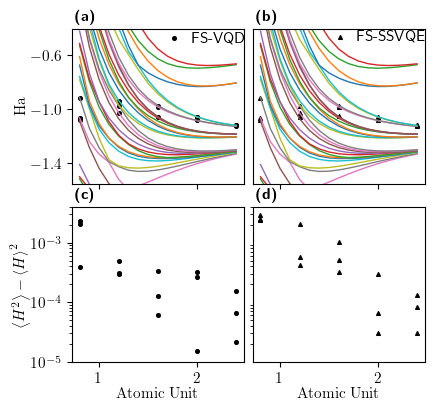

In [ ]:
fig,axes = plt.subplots(2,2,sharex = True,sharey = False, figsize = (1.35*3.375,1.35*0.95*3.375),squeeze = False)#,width_ratios=[1,1.04])
plt.subplots_adjust(hspace=0.15,wspace=0.05)

for i in f_dict.keys():
    if len(r_lst)==len(f_dict[i]):
        axes[0,0].plot(r_lst,f_dict[i])
axes[0,0].text(0.02,1.05,r"$\textbf{(a)}$",transform=axes[0,0].transAxes)
axes[0,0].scatter(r_lst1,E2_FS_arr,s=7,c='k',label='FS-VQD',zorder=-1)
axes[0,0].scatter(r_lst1,E1_FS_arr,s=7,c='k',zorder=-1)
axes[0,0].scatter(r_lst1,E0_FS_arr,s=7,c='k',zorder=-1)
axes[0,0].set_ylim(-1.55,-0.4)
axes[0,0].set_yticks([-1.4,-1.0,-0.6])
axes[0,0].legend(bbox_to_anchor=(1.09, 1.07),loc='upper right',frameon=False,labelspacing = 0.09,handlelength=0.7)
axes[0,0].set_ylabel(r"$\mathrm{Ha}$")

axes[0,1].text(0.02,1.05,r"$\textbf{(b)}$",transform=axes[0,1].transAxes)
axes[0,1].scatter(r_lst1,E2_SS_arr,s=7,c='k',marker='^',label='FS-SSVQE')
axes[0,1].scatter(r_lst1,E1_SS_arr,s=7,c='k',marker='^')
axes[0,1].scatter(r_lst1,E0_SS_arr,s=7,c='k',marker='^')
axes[0,1].legend(bbox_to_anchor=(1.09, 1.08),loc='upper right',frameon=False,labelspacing = 0.09,handlelength=0.7)
for i in f_dict.keys():
    if len(r_lst)==len(f_dict[i]):
        axes[0,1].plot(r_lst,f_dict[i])
axes[0,1].set_ylim(-1.55,-0.4)
axes[0,1].set_yticks([])

axes[1,0].text(0.02,1.05,r"$\textbf{(c)}$",transform=axes[1,0].transAxes)
axes[1,0].scatter(r_lst1,F2_FS_arr,s=7,c='k',label='FS-VQD')
axes[1,0].scatter(r_lst1,F1_FS_arr,s=7,c='k')
axes[1,0].scatter(r_lst1,F0_FS_arr,s=7,c='k')
#axes[1,0].set_yticks([0,0.001,0.002,0.003])
axes[1,0].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$")
axes[1,0].set_ylabel(r"$\left\langle H^{2}\right\rangle -\left\langle H\right\rangle ^{2}$")
axes[1,0].set_ylim(1e-5,4e-3)
axes[1,0].set_yscale('log')

axes[1,1].text(0.02,1.05,r"$\textbf{(d)}$",transform=axes[1,1].transAxes)
axes[1,1].scatter(r_lst1,F2_SS_arr,s=7,c='k',marker='^')
axes[1,1].scatter(r_lst1,F1_SS_arr,s=7,c='k',marker='^')
axes[1,1].scatter(r_lst1,F0_SS_arr,s=7,c='k',marker='^')
axes[1,1].set_ylim(1e-5,4e-3)
axes[1,1].set_yscale('log')
axes[1,1].set_yticks([])
axes[1,1].set_xlabel(r"$\mathrm{Atomic}$ $\mathrm{Unit}$")


plt.savefig("HES.png",dpi = 300,bbox_inches='tight',facecolor='white',transparent=False)

In [ ]:

with open('ADAM_cost.npy', 'rb') as f:
    adam_cost = np.load(f)

with open('QNG_cost_1.npy', 'rb') as f:
    QNG_cost = np.load(f)

with open('GD_cost.npy', 'rb') as f:
    GD_cost = np.load(f)

In [ ]:
adam_iter=np.linspace(1,len(adam_cost),len(adam_cost))
QNG_iter=np.linspace(1,len(QNG_cost),len(QNG_cost))
GD_iter=np.linspace(1,len(GD_cost),len(GD_cost))

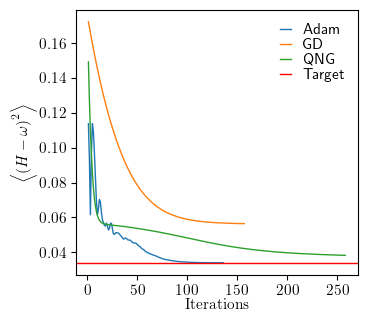

In [ ]:
fig,axes = plt.subplots(1,1,sharex = True,sharey = False, figsize = (1.35*3.375*0.8,1.35*0.85*3.375*8/9),squeeze = False)#,width_ratios=[1,1.04])
axes[0,0].plot(adam_iter,adam_cost,label='Adam')
axes[0,0].plot(GD_iter,GD_cost,label='GD')
axes[0,0].plot(QNG_iter,QNG_cost,label='QNG')

axes[0,0].set_xlabel(r"$\mathrm{Iterations}$")

axes[0,0].set_ylabel(r"$\left\langle \left(H-\omega\right)^{2}\right\rangle $")

axes[0,0].axhline(0.03399506427821475,c='r',label='Target')
axes[0,0].legend(frameon=False,labelspacing = 0.09,handlelength=0.7)
plt.savefig("OPT.png",dpi = 300,bbox_inches='tight',facecolor='white',transparent=False)

In [ ]:
adam_cost[-1]-0.03399506427821475

2.142421788251664e-05

In [ ]:
adam_cost[-1]

0.034016488496097265